<a href="https://colab.research.google.com/github/leelendhu/Video_editing/blob/main/MSE_meero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#import openCV library
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from numpy.core.numeric import Inf

#check the version oc openCV (>4.1)
cv2.__version__

'4.1.2'

We will create a new folder Frames in the content folder ( by default the current folder is content, you can check with !pwd)

In [5]:
!pwd

/content


To input the video, you will have to mount the drive. You will want to run the below cell to mount your google drive into the cloud VM so that you can access its contents. 

NOTE: We will be creating a symbolic link between '/content/gdrive/My\ Drive/' and '/mydrive.

This means we are just creating a shortcut '/mydrive' to map to the contents within the folder '/content/gdrive/My\ Drive/'.

The reason for this is that sometime having the space in 'My Drive' folder path can cause issues when running certain commands. This symbolic link will stop this from happening

I recommend saving images within a folder called 'meero' at the root level of your Google Drive.

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


If the current folder is content, create a subfolder Frames, else first move to content folder and then create a subfolder Frames

In [7]:
mkdir Frames

Move to Frames sub folder

In [8]:
cd Frames

/content/Frames


Now we convert the video into a set of frames and name each frame as "framex.jpg" , where x is the index of the frame. We store them in the Frames folder we are currently in.
The input of the video is from the symbolic link to MyDrive.

In [10]:
vid = cv2.VideoCapture('/content/gdrive/MyDrive/meero/shuffled_19.mp4')
i=0
while(vid.isOpened()):
    ret, frame = vid.read()
    if ret == False:
        break
    path = 'frame'+str(i)+'.jpg'   
    cv2.imwrite(path,frame)
    i+=1
       
number_of_frames  = i
vid.release()

We have the frames stored in the folder with each frame being named as "framex.jpg" x being the index starting from 0. We will find the total number of frames.

In [11]:
print(number_of_frames)

130


We have 130 frames, from 0 to 129. We can check how each frame looks using the cv2_imshow function

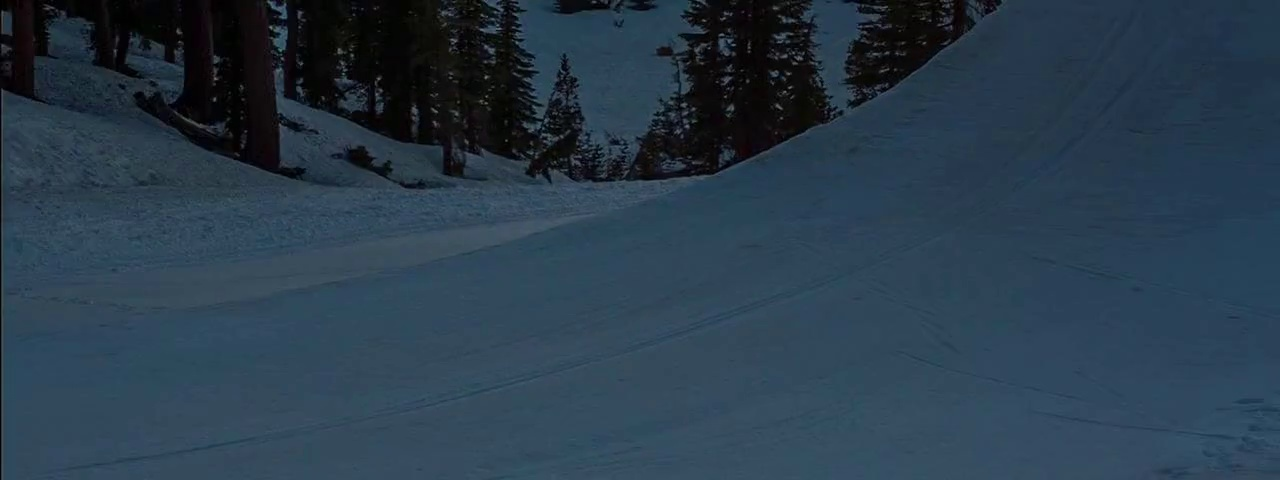

In [12]:

# Using cv2_imshow() method 
# Displaying the image  of frame 4
img0 = cv2.imread('/content/Frames/frame4.jpg')
cv2_imshow(img0)

Now we will create an array called averageL2. This array contains the average L2 norm between the image and its 5 closest neighbours. The idea behind this operation is that the L2 norm between two very similar images would be very low and between two vastly different images would be very high. Since in a video, consequent frames will mostly have very similar images, their L2 norms with their neighbours will be low. While the outliers will have high L2 norms with any other image. By finding the average L2 norm between the image and its 5 closest neighbours, we can easily detect the outliers.

In [13]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [14]:
import numpy as np
averageMSE = np.zeros(130)
for j in range(130):
    A = cv2.imread("frame"+str(j)+".jpg")
    values = np.zeros(130)
    for i in range(130):
        B = cv2.imread("frame"+str(i)+".jpg")

        values[i] = mse(A,B)
    values = np.sort(values)
    avg = sum(values[1:5])/5
    
    averageMSE[j] = avg
print(averageMSE)

[  273.23976855  2911.6045       555.28868685 22519.18628125
   373.36477702 10994.44157259  1900.19399316  2311.18629297
  2962.59574642   951.58728646  2944.67388737  2835.6014375
 22261.65080339  3003.8866901   1152.40092904  2122.30100879
   296.06510677  1771.5347513    721.60862305  2449.40305501
  1254.92299902 20499.87746419   545.67364844  1994.40973503
 22640.58641895  2403.68404948   622.17839681   543.91670931
   364.98437435  2227.19983268   204.43449479   525.80384017
  3281.67294303   587.50321289   538.6404668    344.38520605
   317.45110742 18724.85559245   314.05508496   634.82252767
   653.8887015    515.06675163   456.97116081   649.94027051
 19984.8261403   2284.91740039   525.79971777   636.88088965
   650.19729525   564.78966048   338.01069531    98.24986621
   585.39353548  2517.09410189   593.94108529 21147.33553874
   181.55408822  2747.0352679    588.0168431   1089.33391048
   374.54464421   812.84824772   683.62459342   360.8340306
  3224.2080957   2173.3308

calculating average MSE of nearest 5 neighbours took us 6mins. Calculating the average L2 norm of nearest 5 neighbours took us 

Let us sort this averageMSE array in the ascending order. The outliers will have a large MSE error, so they will be in the end. 

In [15]:
averageMSE_sort = np.sort(averageMSE)
print(averageMSE_sort)

[   63.59560514    68.89576855    69.71238477    98.24986621
   135.76122428   181.55408822   204.43449479   227.73080794
   264.74296257   265.96476628   273.23976855   296.06510677
   308.34291439   314.05508496   317.45110742   320.53735482
   338.01069531   344.38520605   349.98671549   360.8340306
   364.98437435   373.36477702   374.54464421   412.22527344
   456.97116081   458.20142546   515.06675163   522.10780436
   525.79971777   525.80384017   529.46188737   538.6404668
   543.91670931   545.67364844   555.28868685   564.78966048
   580.7761263    584.18755859   585.39353548   587.50321289
   588.0168431    593.94108529   599.08430892   622.17839681
   623.27410579   634.82252767   635.30139551   636.88088965
   642.6729401    649.94027051   650.19729525   653.8887015
   658.44149544   683.62459342   684.29272852   686.60988021
   721.60862305   788.83006022   789.29476563   790.64470475
   793.74516634   802.0602373    810.05234863   812.84824772
   819.81368001   864.65434

We can see that there will be a big gap between the average MSE error of the actual video frames and the outliers. We will calculate the biggest jump and use that as the distinction between outliers and wanted images, i.e the ones to the right of the biggest jump would be outliers and the ones to the left of the biggest jump would be our video frames. 

In [19]:
biggestjump = 0
index_of_biggestjump = 0
for i in range(len(averageMSE_sort) - 1):
  jump = averageMSE_sort[i+1] - averageMSE_sort[i]
  if jump > biggestjump:
    biggestjump = jump
    index_of_biggestjump = i

print("the biggest jump is {0} and occurs between the {1}th and {2}th element\n".format(biggestjump,index_of_biggestjump,index_of_biggestjump+1))
print("So all the elements above averageMSE error of {0} are outliers \n".format(averageMSE_sort[index_of_biggestjump]))

the biggest jump is 7712.768629557293 and occurs between the 119th and 120th element

So all the elements above averageL2 error of 3281.672943033854 are outliers 



Now we will remove all the outliers using the max averageMSE error we obtained above. This can be achieved by removing all the elements from averageMSE array who have a value greater than averageMSE error of the index of the biggest jump. We will call this new list as corrected list

In [20]:
corrected_list = list([])
barrier = averageMSE_sort[index_of_biggestjump]
for i in range(number_of_frames):
    if averageMSE[i]<=barrier:
        corrected_list.append(i)
print(corrected_list)
print(len(averageMSE_sort))
print(len(corrected_list))
print("the number of removed outliers is {0}".format(len(averageMSE_sort)-len(corrected_list)))

[0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]
130
120
the number of removed outliers is 10


In [34]:

corrected_array = []
for i in corrected_list:
  name = "frame"+str(i)+".jpg"
  img = cv2.imread(name)
  corrected_array.append(img)

To get an idea about the remaining frames let us merge all the frames to get a video

In [22]:
img=[]
for i in corrected_list:
    img.append(cv2.imread("frame"+str(i)+".jpg"))

height,width,layers=img[0].shape

video=cv2.VideoWriter('video_without_outliers.mp4',cv2.VideoWriter_fourcc('m', 'p', '4', 'v'),15,(width,height))

for j in range(len(corrected_list)):
    video.write(img[j])

cv2.destroyAllWindows()
video.release()


Unfortunately, google collab cannot run videos, so download the video.mp4 file from the Frames folder and run it. We see that the outliers have been removed. Now we have to unjumble the remaining frames. Consequent frames in a video will have the least amount of MSE between them. So if we find one end of the video, that is the starting frame or the ending frame, we can find nearest neighbour to it and do it recursively. (explain better)

In [26]:
test = corrected_array
array = test


i = 0
sorted = []
sorted.append(array[i])
array.pop(i)


 
while len(array) > 1:
  nf =10000
  ind1 = 0
  ind2 = 0

  for j in range(len(array)):
    img1 = sorted[i]
    img2 = array[j]
    d = mse(img1, img2)
    if d < nf:
      nf = d
      ind1 = j

  
  sorted.append(array[ind1])
  array.pop(ind1)
  
  i = i+1

sorted.append(array[0])

Now that we have a sorted array of all the 

In [28]:
img=[]
for i in sorted:
    img.append(i)

height,width,layers=img[0].shape

video_fin=cv2.VideoWriter('video_unjumbled_mse.mp4',cv2.VideoWriter_fourcc('m', 'p', '4', 'v'),15,(width,height))

for j in range(len(sorted)):
    video_fin.write(img[j])

cv2.destroyAllWindows()
video_fin.release()

Video with nearest neighbouor based on L2 norm

In [41]:

corrected_array = []
for i in corrected_list:
  name = "frame"+str(i)+".jpg"
  img = cv2.imread(name)
  corrected_array.append(img)
  
test = corrected_array
array = test

temp = array.pop(67)
array.append(temp)

i = 0
sorted = []
sorted.append(array[i])
array.pop(i)


 
while len(array) > 1:
  nf = Inf
  ind1 = 0
  ind2 = 0

  for j in range(len(array)):
    img1 = sorted[i]
    img2 = array[j]
    d = cv2.norm(img1, img2, cv2.NORM_L2)
    if d < nf:
      nf = d
      ind1 = j

  
  sorted.append(array[ind1])
  array.pop(ind1)
  
  i = i+1

sorted.append(array[0])

In [42]:
img=[]
for i in sorted:
    img.append(i)

height,width,layers=img[0].shape

video_fin=cv2.VideoWriter('video_unjumbled_l2norm.mp4',cv2.VideoWriter_fourcc('m', 'p', '4', 'v'),15,(width,height))

for j in range(len(sorted)):
    video_fin.write(img[j])

cv2.destroyAllWindows()
video_fin.release()